In [56]:
import os
import numpy as np
import pandas as pd

# Import Data

In [57]:
path = os.getcwd()
path

'/Users/Wayne/Desktop/CentraleSupelec & ESSEC/Lecture/M2/M2_T2/NLP/Assignment/nlp_assignment'

In [58]:
train_df = pd.read_csv(f"{path}/data/traindata.csv", delimiter='	', header=None, 
                       names=['polarity', 'aspect_category', 'target_term', 'char_offsets', 'sentence'])
val_df = pd.read_csv(f"{path}/data/devdata.csv", delimiter='	', header=None, 
                    names=['polarity', 'aspect_category', 'target_term', 'char_offsets', 'sentence'])

## Train Data

In [32]:
train_df.head()

,polarity,aspect_category,target_term,char_offsets,sentence
0,positive,AMBIENCE#GENERAL,seating,18:25,short and sweet – seating is great:it's romant...
1,positive,AMBIENCE#GENERAL,trattoria,25:34,This quaint and romantic trattoria is at the t...
2,positive,FOOD#QUALITY,food,98:102,The have over 100 different beers to offer thi...
3,negative,SERVICE#GENERAL,STAFF,5:10,THIS STAFF SHOULD BE FIRED.
4,positive,FOOD#STYLE_OPTIONS,menu,4:8,"The menu looked great, and the waiter was very..."


In [19]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503 entries, 0 to 1502
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   polarity         1503 non-null   object
 1   aspect_category  1503 non-null   object
 2   target_term      1503 non-null   object
 3   char_offsets     1503 non-null   object
 4   sentence         1503 non-null   object
dtypes: object(5)
memory usage: 58.8+ KB


## Validation Data

In [16]:
val_df.head()

,polarity,aspect_category,target_term,char_offsets,sentence
0,positive,LOCATION#GENERAL,neighborhood,54:66,"great food, great wine list, great service in ..."
1,negative,RESTAURANT#GENERAL,place,15:20,I thought this place was totally overrated.
2,positive,FOOD#QUALITY,Fish,0:4,Fish is so very fresh.
3,negative,SERVICE#GENERAL,manager,19:26,"I showed it to the manager, and he smilingly a..."
4,neutral,DRINKS#QUALITY,margaritas,63:73,"The food we ordered was excellent, although I ..."


In [20]:
val_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 376 entries, 0 to 375
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   polarity         376 non-null    object
 1   aspect_category  376 non-null    object
 2   target_term      376 non-null    object
 3   char_offsets     376 non-null    object
 4   sentence         376 non-null    object
dtypes: object(5)
memory usage: 14.8+ KB


# EDA

In [36]:
train_df.aspect_category.unique()

array(['AMBIENCE#GENERAL', 'FOOD#QUALITY', 'SERVICE#GENERAL',
       'FOOD#STYLE_OPTIONS', 'DRINKS#QUALITY', 'RESTAURANT#MISCELLANEOUS',
       'RESTAURANT#GENERAL', 'DRINKS#PRICES', 'FOOD#PRICES',
       'LOCATION#GENERAL', 'DRINKS#STYLE_OPTIONS', 'RESTAURANT#PRICES'],
      dtype=object)

In [37]:
val_df.aspect_category.unique()

array(['LOCATION#GENERAL', 'RESTAURANT#GENERAL', 'FOOD#QUALITY',
       'SERVICE#GENERAL', 'DRINKS#QUALITY', 'AMBIENCE#GENERAL',
       'RESTAURANT#MISCELLANEOUS', 'FOOD#STYLE_OPTIONS', 'FOOD#PRICES',
       'DRINKS#STYLE_OPTIONS', 'RESTAURANT#PRICES', 'DRINKS#PRICES'],
      dtype=object)

## target variable - polarity

In [43]:
train_df.polarity.value_counts()

polarity
positive    1055
negative     390
neutral       58
Name: count, dtype: int64

In [44]:
val_df.polarity.value_counts()

polarity
positive    264
negative     98
neutral      14
Name: count, dtype: int64

<Axes: ylabel='aspect_category'>

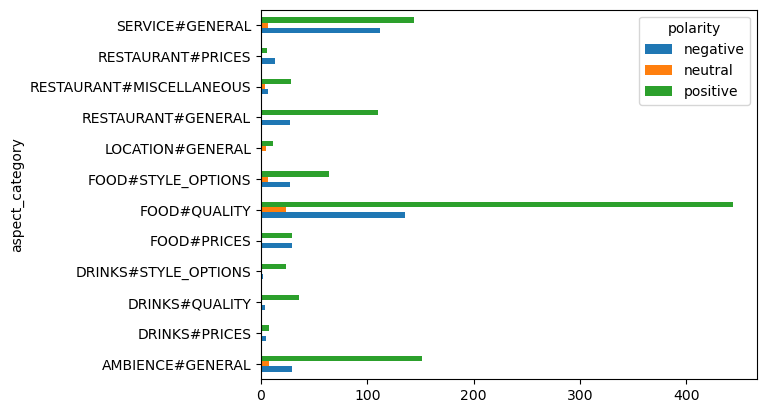

In [45]:
pd.pivot_table(train_df, values = "sentence", index = "aspect_category", columns = "polarity", 
               aggfunc = "count", fill_value = 0).plot(kind="barh")

<Axes: ylabel='aspect_category'>

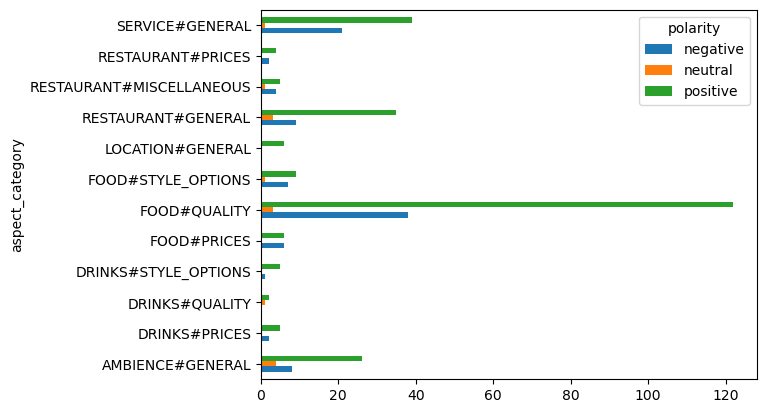

In [46]:
pd.pivot_table(val_df, values = "sentence", index = "aspect_category", columns = "polarity", 
               aggfunc = "count", fill_value = 0).plot(kind="barh")

**Both are imbalance datasets, especially in "neutral" polarity**

In [49]:
# 1 sentence can have multiple rows in dataset
train_df.loc[train_df.sentence.duplicated(keep = False) == True
            ].groupby("sentence", group_keys=True).apply(lambda x: x)

polarity  \
sentence                                                            
$6 and there is much tasty food, all of it fres... 1135  positive   
                                                   1258  positive   
                                                   1419  positive   
A cool bar with great food, and tons of excelle... 551   positive   
                                                   1155  positive   
...                                                           ...   
the pad se ew chicken was delicious, however th... 429   negative   
this little place has a cute interior decor and... 62    positive   
                                                   1500  positive   
those rolls were big, but not good and sashimi ... 778   negative   
                                                   818   negative   

                                                            aspect_category  \
sentence                                                                      
$6 and there is much tasty food, all of it fres... 1135         FOOD#PRICES   
                                                   1258        FOOD#QUALITY   
                                                   1419  FOOD#STYLE_OPTIONS   
A cool bar with great food, and tons of excelle... 551     AMBIENCE#GENERAL   
                                                   1155      DRINKS#QUALITY   
...                                                                     ...   
the pad se ew chicken was delicious, however th... 429         FOOD#QUALITY   
this little place has a cute interior decor and... 62      AMBIENCE#GENERAL   
                                                   1500   RESTAURANT#PRICES   
those rolls were big, but not good and sashimi ... 778         FOOD#QUALITY   
                                                   818         FOOD#QUALITY   

                                                            target_term  \
sentence                                                                  
$6 and there is much tasty food, all of it fres... 1135            food   
                                                   1258            food   
                                                   1419            food   
A cool bar with great food, and tons of excelle... 551              bar   
                                                   1155            beer   
...                                                                 ...   
the pad se ew chicken was delicious, however th... 429         pad thai   
this little place has a cute interior decor and... 62    interior decor   
                                                   1500           place   
those rolls were big, but not good and sashimi ... 778          sashimi   
                                                   818            rolls   

                                                        char_offsets  \
sentence                                                               
$6 and there is much tasty food, all of it fres... 1135        27:31   
                                                   1258        27:31   
                                                   1419        27:31   
A cool bar with great food, and tons of excelle... 551          7:10   
                                                   1155        50:54   
...                                                              ...   
the pad se ew chicken was delicious, however th... 429         49:57   
this little place has a cute interior decor and... 62          29:43   
                                                   1500        12:17   
those rolls were big, but not good and sashimi ... 778         39:46   
                                                   818          6:11   

                                                                                                  sentence  
sentence                                                                                                    


In [51]:
# 1 sentence can have multiple rows in dataset
val_df.loc[val_df.sentence.duplicated(keep = False) == True
            ].groupby("sentence", group_keys=True).apply(lambda x: x)

polarity  \
sentence                                                           
Admittedly some nights inside the restaurant we... 210  negative   
                                                   270  positive   
Delicate spices, onions, eggs and a kick-ass roti. 70   positive   
                                                   116  positive   
Fabulous decor - makes you feel like you're in ... 191  positive   
                                                   301  positive   
However, if you want great food at a great pric... 54   positive   
                                                   247   neutral   
I'll being with a couple of positives: cool dec... 74   positive   
                                                   274  positive   
It may be a bit packed on weekends, but the vib... 147  positive   
                                                   157  positive   
One special roll and one regular roll is enough... 43   positive   
                                                   96   positive   
                                                   275  positive   
Thalia is a beautiful restaurant with beautiful... 304  negative   
                                                   331  positive   
The anti-pasta was excellent, especially the ca... 231  positive   
                                                   375  positive   
The bread was stale, the salad was overpriced a... 53   negative   
                                                   81   negative   
The crust has a great bite and a good chew, the... 89   positive   
                                                   192  positive   
                                                   196  positive   
The crust is thin, the ingredients are fresh an... 132  positive   
                                                   148  positive   
The decor however seems to be the distraction s... 93    neutral   
                                                   133  negative   
The food is delicious - from the specials to th... 232  positive   
                                                   352  positive   
The food was delicious (I had a halibut special... 85   positive   
                                                   215  positive   
The food we ordered was excellent, although I w... 4     neutral   
                                                   18   positive   
The location and ambience is Ok but the food is... 91   positive   
                                                   364   neutral   
The manager came to the table and said we can d... 161  positive   
                                                   323  negative   
The pasta was well cooked, didn't have enough s... 35   positive   
                                                   220  negative   
The pizza is yummy and I like the atmoshpere.      57   positive   
                                                   208  positive   
The sandwiches are dry, tasteless and way overp... 62   negative   
                                                   311  negative   
They have a huge selection of different cream c... 131  positive   
                                                   260  positive   
This is some really good, inexpensive sushi.       13   positive   
                                                   199  positive   
While the ambiance and atmosphere were great, t... 187  negative   
                                                   235  negative   
good music, great food, speedy service affordab... 38   positive   
                                                   102  positive   
great food, great wine list, great service in a... 0    positive   
                                                   163  positive   
im not necessarily fanatical about this place, ... 280  positive   
                                                   294  positive   
limited menu, no-so-fresh ingredients, thinly-s... 118  negative   
                                            

In [54]:
# the distribution of polarity for duplicated sentences in train dataset
duplicates_train = train_df.loc[train_df.sentence.duplicated(keep = False) == True].groupby("sentence").agg(count_y = ("polarity", "count"), num = ("polarity", "nunique"))
duplicates_train.sort_values(by = ["num", "count_y"], ascending = (True, False)).groupby("num").sum()

,count_y
num,
1,618
2,146
3,3


In [55]:
# the distribution of polarity for duplicated sentences in validation dataset
duplicates_val = val_df.loc[val_df.sentence.duplicated(keep = False) == True].groupby("sentence").agg(count_y = ("polarity", "count"), num = ("polarity", "nunique"))
duplicates_val.sort_values(by = ["num", "count_y"], ascending = (True, False)).groupby("num").sum()

,count_y
num,
1,44
2,16


**It shows that, for example, if a review contains a negative sentiment for a given aspect, other aspects will most likely be rated negative as well.**

In [76]:
import numpy as np
import nltk
from nltk.corpus import wordnet
nltk.download('averaged_perceptron_tagger', quiet=True)

class DataAugmentor:
    def __init__(self, p_replace=0.5, num_replacements=1, random_state=None):
        """
        Initialize the data augmentor.
        :param p_replace: Probability of replacing each word with a synonym.
        :param num_replacements: Number of words to try replacing in each sentence.
        :param random_state: Random state for reproducibility.
        """
        self.p_replace = p_replace
        self.num_replacements = num_replacements
        if random_state is not None:
            np.random.seed(random_state)
    
    def replace_synonym(self, word, pos=None):
        """
        Replace a word with one of its synonyms based on its part of speech (POS).
        :param word: The word to replace.
        :param pos: The part of speech of the word.
        :return: A synonym of the word if found, else the word itself.
        """
        synonyms = []
        for syn in wordnet.synsets(word, pos=pos):
            for lem in syn.lemmas():
                synonym = lem.name().replace('_', ' ')
                synonyms.append(synonym)
        synonyms = list(set(synonyms))
        if synonyms:
            return np.random.choice(synonyms)
        return word
    
    def augment_sentence(self, sentence):
        """
        Augment a sentence by replacing some words with their synonyms.
        :param sentence: The sentence to augment.
        :return: The augmented sentence.
        """
        words = nltk.word_tokenize(sentence)
        pos_tags = nltk.pos_tag(words)
        
        # Decide which words to replace
        replacement_indices = np.random.choice(len(words), min(self.num_replacements, len(words)), replace=False)
        
        for idx in replacement_indices:
            if np.random.rand() < self.p_replace:
                word, pos_tag = words[idx], pos_tags[idx][1]
                pos = None
                if pos_tag.startswith('NN'):
                    pos = wordnet.NOUN
                elif pos_tag.startswith('VB'):
                    pos = wordnet.VERB
                words[idx] = self.replace_synonym(word, pos=pos)
        
        return ' '.join(words)

In [93]:
import nltk
from nltk.corpus import wordnet
import random
from itertools import chain

nltk.download('punkt', quiet=True)
nltk.download('wordnet', quiet=True)
nltk.download('averaged_perceptron_tagger', quiet=True)

def augment_with_synonyms(sentence):
    words = nltk.word_tokenize(sentence)  # Tokenize the sentence
    augmented_sentence = []
    for word in words:
        synonyms = set(chain.from_iterable([syn.lemma_names() for syn in wordnet.synsets(word)]))
        synonyms.discard(word)  # Optionally, remove the original word from synonyms
        if synonyms:
            augmented_sentence.append(random.choice(list(synonyms)))
        else:
            augmented_sentence.append(word)
    return ' '.join(augmented_sentence)

In [94]:
# Example usage
import random
from itertools import chain
random_number = random.randint(1, 1000)

sentence = train_df["sentence"][random_number]
augmentor = DataAugmentor(p_replace=0.5, num_replacements=2, random_state=42)
augmented_sentence = augment_with_synonyms(sentence)
print(sentence)
print("===")
print(augmented_sentence)

Authentic Pakistani food.
===
bona_fide Pakistani solid_food .
